## Project 9 - Automobile

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Importing the dataset

In [96]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 9 - Automobile'

#### Loading the dataset

In [4]:
df1 = pd.read_csv('Import.csv',header = None)
df1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
df2 = pd.read_csv('Import_Names.csv',header = None)
df2

,0
0,symboling
1,normalized-losses
2,make
3,fuel-type
4,aspiration
5,num-of-doors
6,body-style
7,drive-wheels
8,engine-location
9,wheel-base


In [6]:
# Combining the names in the second dataset with the columns of the first dataset

temp = ["symboling"]
for i in range (1,len(df2[0])):
    temp.append(df2[0][i])
print (temp)

df1.columns = temp
print(df1.head)
    

['symboling', ' normalized-losses', ' make', ' fuel-type', ' aspiration', ' num-of-doors', ' body-style', ' drive-wheels', ' engine-location', ' wheel-base', ' length', ' width', ' height', ' curb-weight', ' engine-type', ' num-of-cylinders', ' engine-size', ' fuel-system', ' bore', ' stroke', ' compression-ratio', ' horsepower', ' peak-rpm', ' city-mpg', ' highway-mpg', ' price']
<bound method NDFrame.head of      symboling  normalized-losses         make  fuel-type  aspiration  \
0            3                  ?  alfa-romero        gas         std   
1            3                  ?  alfa-romero        gas         std   
2            1                  ?  alfa-romero        gas         std   
3            2                164         audi        gas         std   
4            2                164         audi        gas         std   
..         ...                ...          ...        ...         ...   
200         -1                 95        volvo        gas         std   
20

#### Converting the Data into a DataFrame

In [7]:
df = pd.DataFrame(df1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### Detail and description of the DataFrame

In [8]:
df.shape

(205, 26)

In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Data Cleaning

In [10]:
#### To show a quick insight to the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1    normalized-losses  205 non-null    object 
 2    make               205 non-null    object 
 3    fuel-type          205 non-null    object 
 4    aspiration         205 non-null    object 
 5    num-of-doors       205 non-null    object 
 6    body-style         205 non-null    object 
 7    drive-wheels       205 non-null    object 
 8    engine-location    205 non-null    object 
 9    wheel-base         205 non-null    float64
 10   length             205 non-null    float64
 11   width              205 non-null    float64
 12   height             205 non-null    float64
 13   curb-weight        205 non-null    int64  
 14   engine-type        205 non-null    object 
 15   num-of-cylinders   205 non-null    object 
 16   engine-

In [11]:
df.replace('?', np.nan, inplace= True)

In [12]:
df.isnull().sum()

symboling              0
 normalized-losses    41
 make                  0
 fuel-type             0
 aspiration            0
 num-of-doors          2
 body-style            0
 drive-wheels          0
 engine-location       0
 wheel-base            0
 length                0
 width                 0
 height                0
 curb-weight           0
 engine-type           0
 num-of-cylinders      0
 engine-size           0
 fuel-system           0
 bore                  4
 stroke                4
 compression-ratio     0
 horsepower            2
 peak-rpm              2
 city-mpg              0
 highway-mpg           0
 price                 4
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [15]:
df.columns

Index(['symboling', ' normalized-losses', ' make', ' fuel-type', ' aspiration',
       ' num-of-doors', ' body-style', ' drive-wheels', ' engine-location',
       ' wheel-base', ' length', ' width', ' height', ' curb-weight',
       ' engine-type', ' num-of-cylinders', ' engine-size', ' fuel-system',
       ' bore', ' stroke', ' compression-ratio', ' horsepower', ' peak-rpm',
       ' city-mpg', ' highway-mpg', ' price'],
      dtype='object')

In [16]:
df.rename(columns = {' normalized-losses':'NormalizedLosses'}, inplace = True)
df.rename(columns = {' make':'Make'}, inplace = True)
df.rename(columns = {' fuel-type':'FuelType'}, inplace = True)
df.rename(columns = {' aspiration':'Aspiration'}, inplace = True)
df.rename(columns = {' compression-ratio':'CompressionRatio'}, inplace = True)
df.rename(columns = {' curb-weight':'CurbWeight'}, inplace = True)
df.rename(columns = {' body-style':'BodyStyle'}, inplace = True)
df.rename(columns = {' num-of-doors':'NumOfDoors'}, inplace = True)
df.rename(columns = {' wheel-base':'WheelBase'}, inplace = True)
df.rename(columns = {' engine-type':'EngineType'}, inplace = True)
df.rename(columns = {' bore':'Bore'}, inplace = True)
df.rename(columns = {' city-mpg':'CityMPG'}, inplace = True)
df.rename(columns = {' highway-mpg':'HighwayMPG'}, inplace = True)
df.rename(columns = {'EngineSsize':'EngineSize'}, inplace = True)
df.rename(columns = {' length':'Length'}, inplace = True)
df.rename(columns = {' num-of-cylinders':'NumOfCylinders'}, inplace = True)
df.rename(columns = {' fuel-system':'FuelSystem'}, inplace = True)
df.rename(columns = {' price':'Price'}, inplace = True)
df.rename(columns = {' horsepower':'Horsepower'}, inplace = True)
df.rename(columns = {' width':'Width'}, inplace = True)
df.rename(columns = {' height':'Height'}, inplace = True)
df.rename(columns = {' engine-location':'EngineLocation'}, inplace = True)
df.rename(columns = {' body-style':'Body-style'}, inplace = True)
df.rename(columns = {' peak-rpm':'PeakRPM'}, inplace = True)
df.rename(columns = {'symboling':'Symboling'}, inplace = True)

In [17]:
df

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,drive-wheels,EngineLocation,WheelBase,...,engine-size,FuelSystem,Bore,stroke,CompressionRatio,Horsepower,PeakRPM,CityMPG,HighwayMPG,Price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### Counting the details of few attributes in our DataFrame

In [39]:
plt.style.use('ggplot')

In [40]:
# Counting the values
df['Make'].value_counts()

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             8
volkswagen        8
peugot            7
saab              6
plymouth          6
mercedes-benz     5
audi              4
bmw               4
chevrolet         3
porsche           1
jaguar            1
Name: Make, dtype: int64

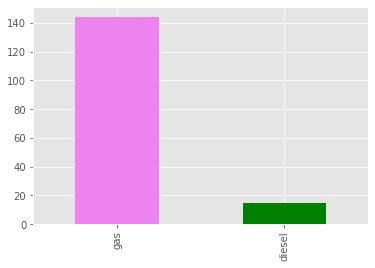

In [41]:
# Plot the value counts with a bar graph
df['FuelType'].value_counts().plot(kind="bar",color=["violet","green"]);

C:\Users\Debjit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


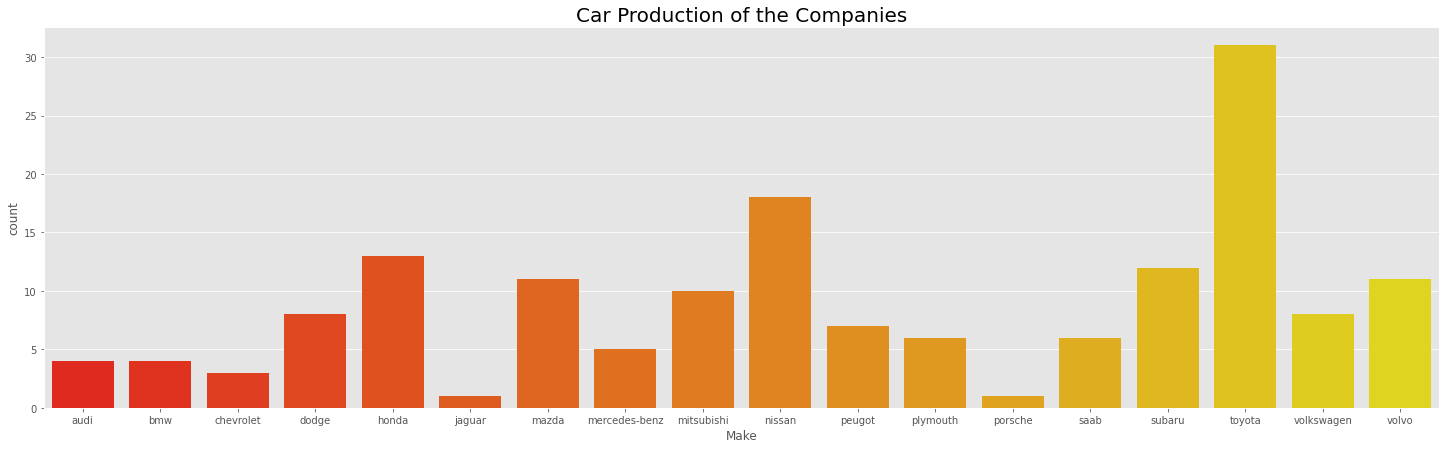

In [46]:
# A figure to show the number of cars from the respective companies
plt.figure(figsize=(25,7))
sns.countplot('Make',data=df,palette='autumn')
plt.title("Car Production of the Companies", size=20);

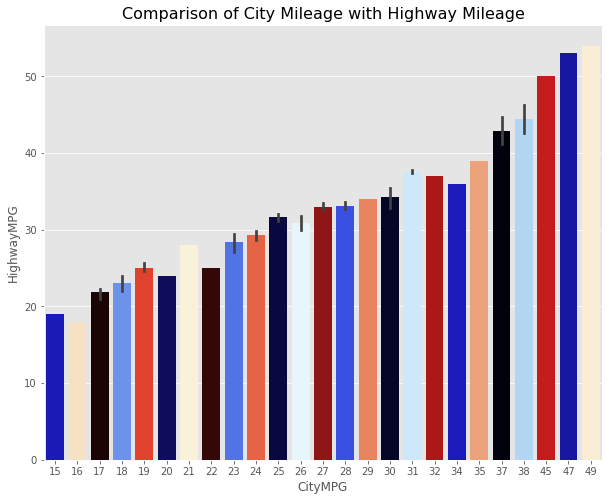

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(y='HighwayMPG',x='CityMPG',data=df,palette='flag')
plt.title("Comparison of City Mileage with Highway Mileage", size=16);

#### Correlation between independent variables

In [22]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Symboling,WheelBase,Length,Width,Height,CurbWeight,engine-size,CompressionRatio,CityMPG,HighwayMPG
Symboling,1.000000,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.138316,0.089550,0.149830
WheelBase,-0.520591,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.291431,-0.580657,-0.611750
Length,-0.336257,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.184814,-0.724544,-0.724599
Width,-0.219186,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.258752,-0.666684,-0.693339
Height,-0.475185,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.233308,-0.199737,-0.226136
CurbWeight,-0.251880,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.224724,-0.762155,-0.789338
engine-size,-0.109453,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.141097,-0.699139,-0.714095
CompressionRatio,-0.138316,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,1.000000,0.278332,0.221483
CityMPG,0.089550,-0.580657,-0.724544,-0.666684,-0.199737,-0.762155,-0.699139,0.278332,1.000000,0.971999
HighwayMPG,0.149830,-0.611750,-0.724599,-0.693339,-0.226136,-0.789338,-0.714095,0.221483,0.971999,1.000000


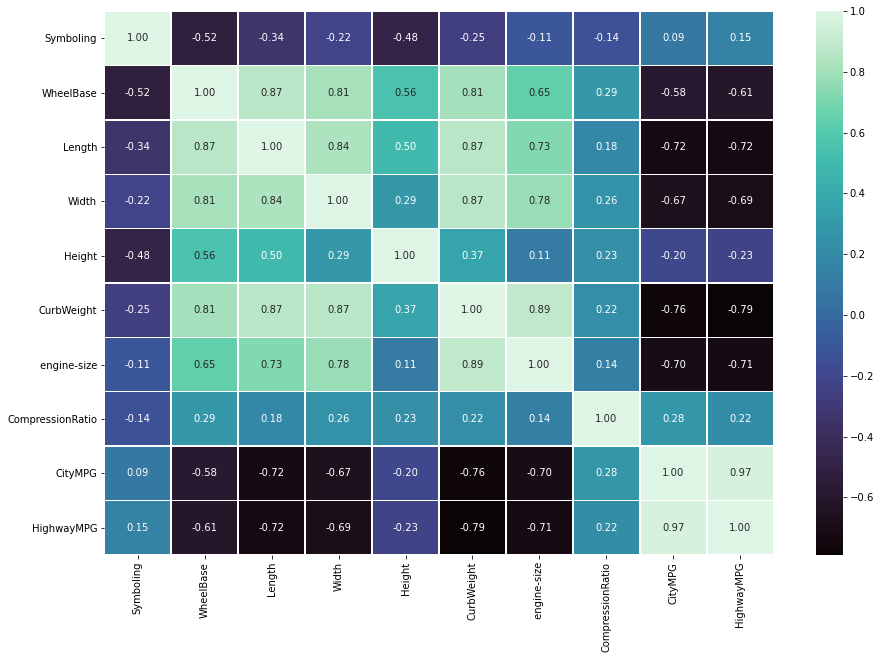

In [23]:
# Another figure with a little better look

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap="mako");

#### Now we will prepare the data for fitting the model

In [24]:
df.head()

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,drive-wheels,EngineLocation,WheelBase,...,engine-size,FuelSystem,Bore,stroke,CompressionRatio,Horsepower,PeakRPM,CityMPG,HighwayMPG,Price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [25]:
df.reset_index(inplace=True)

In [26]:
# Everything except target variable
X = df.drop("Price", axis=1)

# Target variable
y = df["Price"]

In [28]:
X.drop('index', axis=1, inplace=True)

In [47]:
# Converting the X dataset into dummy variables
X = pd.get_dummies(X)

In [50]:
# Independent variables (no target column)
X.head()

,Symboling,WheelBase,Length,Width,Height,CurbWeight,engine-size,CompressionRatio,CityMPG,HighwayMPG,...,PeakRPM_5100,PeakRPM_5200,PeakRPM_5250,PeakRPM_5300,PeakRPM_5400,PeakRPM_5500,PeakRPM_5600,PeakRPM_5800,PeakRPM_6000,PeakRPM_6600
0,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,...,0,0,0,0,0,1,0,0,0,0
1,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,...,0,0,0,0,0,1,0,0,0,0
2,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,...,0,0,0,0,0,1,0,0,0,0
3,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20,...,0,0,0,0,0,1,0,0,0,0
4,2,101.2,176.8,64.8,54.3,2395,108,8.8,23,29,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# Sex column
y

0      13950
1      17450
2      17710
3      23875
4      16430
       ...  
154    16845
155    19045
156    21485
157    22470
158    22625
Name: Price, Length: 159, dtype: object

#### Splitting the data into Train & Test

In [52]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [53]:
X_train.head(10)

,Symboling,WheelBase,Length,Width,Height,CurbWeight,engine-size,CompressionRatio,CityMPG,HighwayMPG,...,PeakRPM_5100,PeakRPM_5200,PeakRPM_5250,PeakRPM_5300,PeakRPM_5400,PeakRPM_5500,PeakRPM_5600,PeakRPM_5800,PeakRPM_6000,PeakRPM_6600
75,3,91.3,170.7,67.9,49.7,3139,181,7.8,17,23,...,0,1,0,0,0,0,0,0,0,0
138,3,102.9,183.5,67.7,52.0,3016,171,9.3,19,24,...,0,1,0,0,0,0,0,0,0,0
2,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,...,0,0,0,0,0,1,0,0,0,0
86,1,93.7,157.3,63.8,50.6,1967,90,9.4,31,38,...,0,0,0,0,0,1,0,0,0,0
45,-1,110.0,190.9,70.3,58.7,3750,183,21.5,22,25,...,0,0,0,0,0,0,0,0,0,0
42,0,98.8,177.8,66.5,55.5,2425,122,8.6,26,32,...,0,0,0,0,0,0,0,0,0,0
68,2,95.1,162.4,63.8,53.3,2008,97,9.4,31,37,...,0,1,0,0,0,0,0,0,0,0
118,0,95.7,166.3,64.4,52.8,2275,110,22.5,38,47,...,0,0,0,0,0,0,0,0,0,0
26,0,96.5,167.5,65.2,53.3,2236,110,9.0,27,33,...,0,0,0,0,0,0,0,1,0,0
137,3,102.9,183.5,67.7,52.0,2976,171,9.3,20,24,...,0,1,0,0,0,0,0,0,0,0


In [54]:
X_test.head(10)

,Symboling,WheelBase,Length,Width,Height,CurbWeight,engine-size,CompressionRatio,CityMPG,HighwayMPG,...,PeakRPM_5100,PeakRPM_5200,PeakRPM_5250,PeakRPM_5300,PeakRPM_5400,PeakRPM_5500,PeakRPM_5600,PeakRPM_5800,PeakRPM_6000,PeakRPM_6600
78,0,107.9,186.7,68.4,56.7,3197,152,21.0,28,33,...,0,0,0,0,0,0,0,0,0,0
155,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25,...,0,0,0,1,0,0,0,0,0,0
128,2,98.4,176.2,65.6,52.0,2551,146,9.3,24,30,...,0,0,0,0,0,0,0,0,0,0
55,1,96.3,172.4,65.4,51.6,2365,122,8.5,25,32,...,0,0,0,0,0,0,0,0,0,0
94,2,99.1,186.6,66.5,56.1,2758,121,9.3,21,28,...,0,0,1,0,0,0,0,0,0,0
29,0,96.5,175.4,62.5,54.1,2372,110,9.0,27,33,...,0,0,0,0,0,0,0,1,0,0
147,3,94.5,165.7,64.0,51.4,2221,109,8.5,24,29,...,0,0,0,0,0,1,0,0,0,0
51,2,93.7,157.3,64.4,50.8,2004,92,9.4,31,38,...,0,0,0,0,0,1,0,0,0,0
98,2,93.7,157.9,63.6,53.7,2120,108,8.7,26,31,...,0,0,0,0,0,0,0,0,0,0
141,2,97.3,171.7,65.5,55.7,2209,109,9.0,27,34,...,0,0,1,0,0,0,0,0,0,0


In [55]:
y_train, len(y_train)

(75     19699
 138    15998
 2      17710
 86      6229
 45     28248
        ...  
 71     13499
 106    10198
 14      6229
 92     12170
 102     9960
 Name: Price, Length: 127, dtype: object,
 127)

In [56]:
y_test, len (y_test)

(78     13200
 155    19045
 128     9989
 55      6989
 94     15510
 29     10295
 147     9980
 51      6669
 98      7053
 141     7975
 19      6479
 60      7099
 15      6692
 65      7799
 24      7295
 30     12945
 126     8449
 101     7775
 96     18620
 16      7609
 151    16515
 18     12964
 12      6377
 9       6295
 31     10345
 125     9538
 95     18150
 56      8189
 145     9495
 152    18420
 135    10898
 76     18399
 Name: Price, dtype: object,
 32)

#### Model choices

1. Linear Regression
2. Lasso Regression
3. Ridge Regression

### Linear Regression

In [57]:
# Importing the required library for the model

from sklearn.linear_model import LinearRegression

In [91]:
#model Creation
LReg_model = LinearRegression()

#fitting the model
LReg_model.fit(X_train, y_train)

#co efficeints
LReg_model.coef_

#intercept
LReg_model.intercept_

#predict 
LReg_pred = LReg_model.predict(X_test)

In [92]:
LReg_model.coef_

array([-7.33943687e+02, -9.21822763e+02, -3.07916303e+01,  4.29836783e+03,
        9.89739277e+02,  2.22255242e+01, -4.40655591e+02,  1.06012098e+03,
       -3.68788604e+01,  3.70854544e+01,  6.77801119e+02, -2.81369975e+03,
        2.99516177e+03, -1.86357083e+03, -6.60983115e+02, -1.90288461e-08,
       -2.17303966e+03,  1.61894551e+03, -1.10291884e+03, -1.93875930e+03,
        1.76518101e+03,  1.86822128e+03, -2.25662789e+02, -1.93024317e+03,
       -2.13752036e+03, -2.84096118e+03, -1.06159504e+01,  5.49165920e+03,
       -3.06474471e+02,  3.55201437e+03,  4.66606387e+03,  1.49883951e+03,
       -1.60620463e+03,  1.97139003e+03,  2.48617441e+03, -7.50029855e+03,
       -2.71898042e+03,  4.06034176e+03, -1.81997398e+03,  3.89475160e+03,
        3.80969942e+03,  1.78639160e+03,  1.16338538e+03,  6.49107332e+02,
        1.95541361e-11,  3.68345354e-11, -1.05912186e+04,  3.89451106e+03,
       -1.53460557e+03,  2.68192951e+02,  3.69706065e+03,  2.09409478e+03,
       -8.13559238e+02,  

In [93]:
LReg_model.intercept_

-234715.94487980462

In [94]:
LReg_pred

array([16202.59616889, 22137.19290233,  7955.73621843,  7907.90209681,
       13570.20802472, -1249.25750188,    94.79387425,  7437.8425519 ,
        6145.59051774,  7424.89598764,  3675.7771456 ,  9083.67754471,
        6750.28979716,  7668.25407651,  7800.54295118, 20586.75260471,
        8904.0287847 , 14263.42602158, 30322.6676137 ,  6750.28979716,
       13555.92533321, 12297.16339493,  5671.41558937,  2423.71872238,
        9273.69158463, 10043.56508235, 29947.61535551,  8796.92306488,
       10661.16102484, 19982.6011439 , 11068.54832041, 11492.26308742])

### Lasso Regression

In [65]:
# Importing the required library for the model

from sklearn.linear_model import Lasso

In [71]:
#model Creation
Lasso_model = Lasso(alpha = 0.2)

#fitting the model
Lasso_model.fit(X_train, y_train)

#co efficeints
Lasso_model.coef_

#intercept
Lasso_model.intercept_

#predict 
Lasso_pred = Lasso_model.predict(X_test)

C:\Users\Debjit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17552251.24955009, tolerance: 486826.5691748032
  model = cd_fast.enet_coordinate_descent(


In [72]:
Lasso_model.coef_

array([-2.82757777e+02, -5.52584877e+01, -4.44229210e+01,  1.90569447e+03,
       -1.09037948e+02,  1.19248027e+01, -6.61737221e+01, -1.38763919e+02,
       -5.06127311e+01,  2.60191799e+01, -5.57729538e+01, -2.77690832e+02,
        1.06401843e+03,  0.00000000e+00, -7.99721308e+02,  0.00000000e+00,
       -4.26310852e+02,  5.87698510e+02,  8.96956844e+02,  0.00000000e+00,
        1.28050488e-01, -4.29744077e+02,  4.38784355e+03, -1.81904872e+02,
       -2.16996756e+03, -8.40123303e+02, -2.99945787e+02,  5.19757371e+02,
        1.08617083e+03,  0.00000000e+00,  0.00000000e+00, -1.81369341e+02,
       -4.67655429e+01, -1.26315697e+03,  2.94294976e+01, -7.51438643e+03,
       -1.16488529e+03,  2.22487599e+03, -1.09659266e+03,  2.12688839e+03,
        6.92100676e+03,  4.92350073e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.07754302e+03,  7.52128817e+02,
        5.11335656e+02,  1.58091784e+02,  2.48636511e+03,  1.05871258e+02,
        0.00000000e+00,  

In [73]:
Lasso_model.intercept_

-110125.28965663226

In [69]:
Lasso_pred

array([16763.77873366, 24298.69850321,  9179.55535167,  7863.97198689,
       12897.52567936,  4509.32694563,  7263.00028657,  6829.58107792,
        7147.31039409,  7873.65487019,  5038.62936992,  2623.57848212,
        6407.10182857,  8017.64047289,  7028.40268737, 10510.9367121 ,
        9821.17059199,  9343.41211859, 22375.76324012,  6407.10182857,
       13571.43182626, 20808.78747034,  5739.90821248,  4063.03827419,
       11293.43798233,  9800.18335571, 22101.79190533,  8340.96409676,
       12358.96591792, 19861.22727872, 10102.30493223, 17766.681178  ])

### Ridge Regression

In [70]:
# Importing the required library for the model

from sklearn.linear_model import Ridge

In [74]:
#model Creation
Ridge_model = Lasso(alpha = 0.2)

#fitting the model
Ridge_model.fit(X_train, y_train)

#co efficeints
Ridge_model.coef_

#intercept
Ridge_model.intercept_

#predict 
Ridge_pred = Ridge_model.predict(X_test)

C:\Users\Debjit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17552251.24955009, tolerance: 486826.5691748032
  model = cd_fast.enet_coordinate_descent(


In [75]:
Ridge_model.coef_

array([-2.82757777e+02, -5.52584877e+01, -4.44229210e+01,  1.90569447e+03,
       -1.09037948e+02,  1.19248027e+01, -6.61737221e+01, -1.38763919e+02,
       -5.06127311e+01,  2.60191799e+01, -5.57729538e+01, -2.77690832e+02,
        1.06401843e+03,  0.00000000e+00, -7.99721308e+02,  0.00000000e+00,
       -4.26310852e+02,  5.87698510e+02,  8.96956844e+02,  0.00000000e+00,
        1.28050488e-01, -4.29744077e+02,  4.38784355e+03, -1.81904872e+02,
       -2.16996756e+03, -8.40123303e+02, -2.99945787e+02,  5.19757371e+02,
        1.08617083e+03,  0.00000000e+00,  0.00000000e+00, -1.81369341e+02,
       -4.67655429e+01, -1.26315697e+03,  2.94294976e+01, -7.51438643e+03,
       -1.16488529e+03,  2.22487599e+03, -1.09659266e+03,  2.12688839e+03,
        6.92100676e+03,  4.92350073e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.07754302e+03,  7.52128817e+02,
        5.11335656e+02,  1.58091784e+02,  2.48636511e+03,  1.05871258e+02,
        0.00000000e+00,  

In [76]:
Ridge_model.intercept_

-110125.28965663226

In [77]:
Ridge_pred

array([16763.77873366, 24298.69850321,  9179.55535167,  7863.97198689,
       12897.52567936,  4509.32694563,  7263.00028657,  6829.58107792,
        7147.31039409,  7873.65487019,  5038.62936992,  2623.57848212,
        6407.10182857,  8017.64047289,  7028.40268737, 10510.9367121 ,
        9821.17059199,  9343.41211859, 22375.76324012,  6407.10182857,
       13571.43182626, 20808.78747034,  5739.90821248,  4063.03827419,
       11293.43798233,  9800.18335571, 22101.79190533,  8340.96409676,
       12358.96591792, 19861.22727872, 10102.30493223, 17766.681178  ])

### Model Comparison

In [79]:
print ( 'Linear Regression:',LReg_model.score(X_train,y_train),
        'Lasso Regression:',Lasso_model.score(X_train,y_train),
        'Ridge Regression:',Ridge_model.score(X_train,y_train),sep="\n")

Linear Regression:
0.9957236542846958
Lasso Regression:
0.9946392969368985
Ridge Regression:
0.9946392969368985


<Figure size 1440x1296 with 0 Axes>

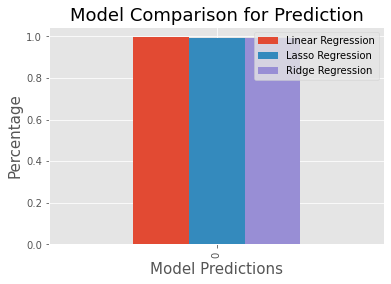

In [81]:
# A figure created to show the comparison of the three model predictions

A = (LReg_model.score(X_train,y_train),Lasso_model.score(X_train, y_train),Ridge_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Linear Regression","Lasso Regression","Ridge Regression"]);

### RMSE

In [95]:
from sklearn import metrics
MSE1= metrics.mean_squared_error(y_test,LReg_pred)
from math import sqrt
rmse1 = sqrt(MSE1)
print("Root Mean Squared Error for Linear Regression:",rmse1)

Root Mean Squared Error for Linear Regression: 4768.597424375378


In [90]:
MSE2= metrics.mean_squared_error(y_test,Lasso_pred)
rmse2 = sqrt(MSE2)
print("Root Mean Squared Error for Lasso Regression:",rmse2)

Root Mean Squared Error for Lasso Regression: 2744.7895046975227


In [89]:
MSE3= metrics.mean_squared_error(y_test,Ridge_pred)
rmse3 = sqrt(MSE3)
print("Root Mean Squared Error for Ridge Regression:",rmse3)

Root Mean Squared Error for Ridge Regression: 2744.7895046975227
